<a href="https://colab.research.google.com/github/suyog1234/suyog1234/blob/main/Predict_Customer_Clicks_on_Advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_set = pd.read_csv('/content/sample_data/Facebook_Ads_2.csv',encoding='ISO-8859-1')

In [3]:
training_set.head()

Names  ... Clicked
0    Martina Avila  ...       0
1    Harlan Barnes  ...       1
2  Naomi Rodriquez  ...       0
3  Jade Cunningham  ...       1
4     Cedric Leach  ...       0

[5 rows x 6 columns]

In [4]:
training_set.tail(5)

Names                                   emails  ...       Salary  Clicked
494   Rigel  egestas.blandit.Nam@semvitaealiquam.com  ...  44969.13495        0
495  Walter                      ligula@Cumsociis.ca  ...  41686.20425        0
496   Vanna       Cum.sociis.natoque@Sedmolestie.edu  ...  23989.80864        0
497   Pearl            penatibus.et@massanonante.com  ...  31708.57054        0
498    Nell        Quisque.varius@arcuVivamussit.net  ...  74331.35442        1

[5 rows x 6 columns]

In [5]:
click = training_set[training_set['Clicked']==1]

In [6]:
no_click = training_set[training_set['Clicked']==0]

In [7]:
print('Total = ',len(training_set))
print('No of customers who clicked =',len(click))
print('No of customers who doesnot clicked =',len(no_click))

Total =  499
No of customers who clicked = 250
No of customers who doesnot clicked = 249


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


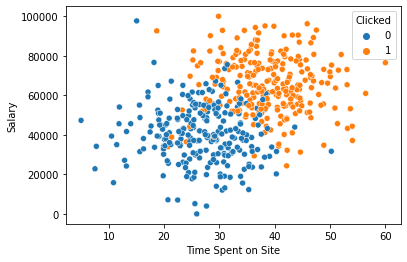

In [8]:
sns.scatterplot(training_set['Time Spent on Site'],training_set['Salary'],hue=training_set['Clicked'])

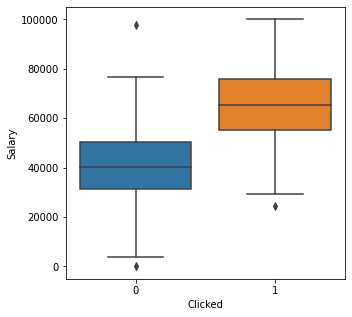

In [9]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Clicked',y='Salary',data=training_set)

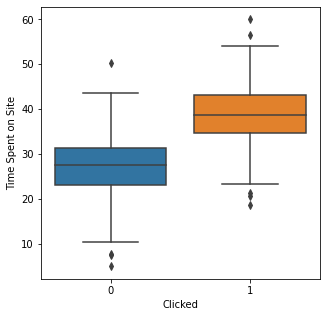

In [10]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Clicked',y='Time Spent on Site',data=training_set)

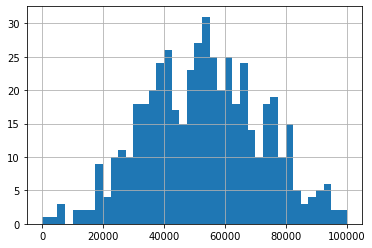

In [11]:
training_set['Salary'].hist(bins=40)

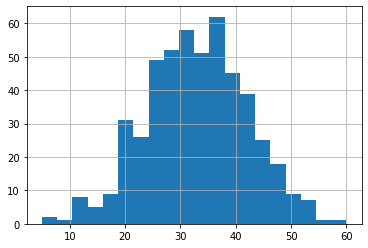

In [12]:
training_set['Time Spent on Site'].hist(bins=20)

In [15]:
training_set.drop(['Names','emails','Country'],axis=1,inplace=True)

In [16]:
training_set

Time Spent on Site       Salary  Clicked
0             25.649648  55330.06006        0
1             32.456107  79049.07674        1
2             20.945978  41098.60826        0
3             54.039325  37143.35536        1
4             34.249729  37355.11276        0
..                  ...          ...      ...
494           19.222746  44969.13495        0
495           22.665662  41686.20425        0
496           35.320239  23989.80864        0
497           26.539170  31708.57054        0
498           32.386148  74331.35442        1

[499 rows x 3 columns]

In [17]:
X = training_set.drop('Clicked',axis=1).values
y = training_set['Clicked'].values

In [18]:
X.shape

(499, 2)

In [19]:
type(X)

numpy.ndarray

In [20]:
y.shape

(499,)

In [21]:
type(y)

numpy.ndarray

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-7.99457658e-01,  1.28257713e-01],
       [-5.10286870e-02,  1.37859159e+00],
       [-1.31666684e+00, -6.21944817e-01],
       [ 2.32223270e+00, -8.30443624e-01],
       [ 1.46195572e-01, -8.19280959e-01],
       [ 2.09908496e+00,  1.46259598e+00],
       [ 1.09531908e+00,  4.75030899e-01],
       [-7.96458904e-01, -1.21483411e+00],
       [ 8.55264296e-01, -9.81324726e-01],
       [-3.55476114e-01, -6.21930555e-01],
       [ 3.87487311e-02,  6.48400206e-02],
       [ 1.77112538e-01, -1.19530208e+00],
       [-8.36398567e-01, -4.81440402e-01],
       [ 1.49769499e+00, -2.23166322e-01],
       [ 5.27406027e-01,  6.21976462e-01],
       [-8.64648371e-01, -1.85222918e+00],
       [ 8.98997888e-01, -1.81000774e-01],
       [-8.97110238e-01, -7.59750031e-01],
       [ 1.75384005e+00, -9.55319376e-01],
       [-5.59287751e-01, -6.60247498e-02],
       [-1.73917217e+00,  4.62029789e-01],
       [-8.05159264e-01,  3.86803184e-02],
       [ 1.02580543e+00, -1.09023371e+00],
       [ 4.

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train.shape

(399, 2)

In [25]:
X_test.shape

(100, 2)

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [27]:
y_predict_train = classifier.predict(X_train)

In [28]:
y_predict_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [29]:
y_train

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
cm = confusion_matrix(y_train,y_predict_train)

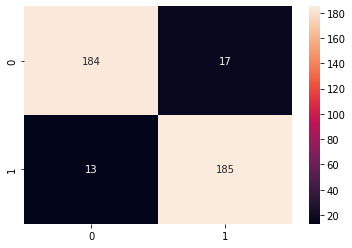

In [34]:
sns.heatmap(cm,annot=True,fmt='d')

In [35]:
y_predict_test = classifier.predict(X_test)

In [36]:
y_predict_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1])

In [37]:
y_test

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

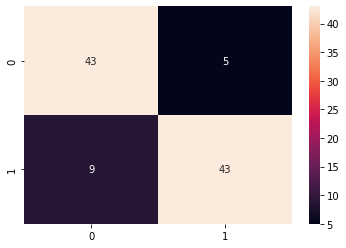

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True,fmt='d')

In [39]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100

